In [1]:
import sys
sys.path.append('../src')
from ra import RoboAdvisor
import numpy as np

In [7]:
beta_list = [0,2,4]
phi_list = [1,2,3,4,5,6,7,8]
r = {}

for beta in beta_list:
    r[beta] = {}
    print(f"beta={beta}")
    for phi in phi_list:
        r[beta][phi] = np.zeros(10000)
        for i in range(10000):
            ra = RoboAdvisor(
                b_r={1:0.0, 2:0.01},
                s_mu={1:0.01, 2:0.03},
                s_sig={1:0.05, 2:0.1},
                P=np.array([[0.95, 0.05], [0.1, 0.9]]),
                alpha=0.01,
                sig_eps=0.64,
                p_eps=0.05,
                beta=beta,
                T=36,
                phi=phi
            )
            ra.run(x0=1, gamma_0=5, y0=1, calc_policy=False, verbose=False)
            r[beta][phi][i] = ra.personalization()
        print(f"beta={beta}, phi = {phi}, r = {r[beta][phi].mean()} ({r[beta][phi].std()})")


beta=0
beta=0, phi = 1, r = 1.0328560036358787e-17 (1.0265562390187332e-17)
beta=0, phi = 2, r = 0.014838397068463025 (0.023728424318889767)
beta=0, phi = 3, r = 0.02945055376090155 (0.04215006480589725)
beta=0, phi = 4, r = 0.04376626323617544 (0.06659519180773159)
beta=0, phi = 5, r = 0.054501604500384805 (0.07813727027535344)
beta=0, phi = 6, r = 0.07193667680042268 (0.10409413759763636)
beta=0, phi = 7, r = 0.08307414327838623 (0.12335222619152737)
beta=0, phi = 8, r = 0.09336822882053439 (0.1374262121478086)
beta=2
beta=2, phi = 1, r = 0.0994172411565473 (0.0227393712753204)
beta=2, phi = 2, r = 0.08136728201763482 (0.029583280755598886)
beta=2, phi = 3, r = 0.08041228694950994 (0.044392551777297)
beta=2, phi = 4, r = 0.08567797023006808 (0.06240593199541961)
beta=2, phi = 5, r = 0.09185629980985642 (0.07919557888839776)
beta=2, phi = 6, r = 0.10287665163295712 (0.10545293589826651)
beta=2, phi = 7, r = 0.11208133203239895 (0.12485682994622337)
beta=2, phi = 8, r = 0.115565331051

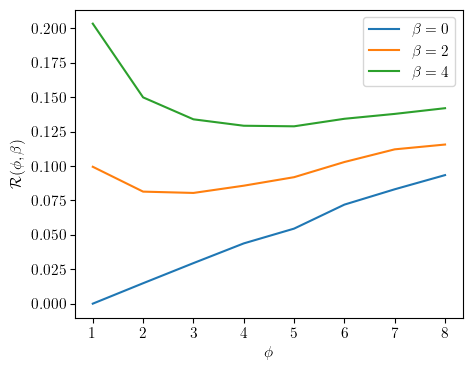

In [33]:
import matplotlib as mpl
from matplotlib import pyplot

mpl.rcParams.update({
        "font.family": "serif",
        "font.size": 11,
        'figure.figsize': (5,4),
        "text.usetex": True
        })

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for beta in [0,2,4]:
    ax.plot(phi_list, [r[beta][phi].mean() for phi in phi_list], label=f"$\\beta={beta}$")
ax.legend()
ax.set_xlabel("$\\phi$")
ax.set_ylabel(r"$\mathcal R(\phi,\beta)$")
# plt.show()
pyplot.savefig("../output/figures/personalization.pdf", bbox_inches='tight')